# Práctica Semanal 2

## Aproximación a derivadas e integrales

   1.  Realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. 

    Valor a aproximar: $f^{(2)}(1) = e^{-1}$. Usar: $\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import quad
from numerical_integration import Tcf, GLf, GHf
from central_finite_derivative import approx_first_derivative, approx_second_derivative, relative_absolute_error

In [2]:
f = lambda x: math.exp(-x)
x = 1.0
h = 10.0**np.append(np.arange(-16,0,2),-1)
df = tuple((math.log10(h),math.log10(relative_absolute_error(approx_second_derivative(f,x,h),f(x)))) for h in h)
df = pd.DataFrame.from_records(df, columns =['h', 'error']) 

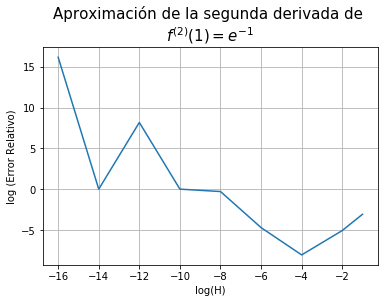

In [3]:
%matplotlib inline
df.plot(x = 'h', y = 'error', legend=None)
plt.title('Aproximación de la segunda derivada de \n$f^{(2)}(1) = e^{-1}$', fontsize=15)
plt.xlabel('log(H)', fontsize=10)
plt.ylabel('log (Error Relativo)', fontsize=10)
plt.grid()
plt.show()     

   2. Crear un módulo con nombre `central_finite_derivative.py` en el que se tengan dos funciones de Python que aproximen la primera y segunda derivada de una función en un punto $x$. Ambas funciones reciben fun, x y h donde: fun es la función a calcularse su primera y segunda derivadas, x es el punto donde se realiza la aproximación y h es el parámetro de espaciado entre x y x+h igual a $h=10^{-6}$.

   * Función=`math.atan`, $x$=0.9 y $h=10^{-6}$

In [4]:
f = math.atan
x = 0.9
h = 1e-06
fd = approx_first_derivative(f,x,h)
sd = approx_second_derivative(f,x,h)

In [5]:
print('Primera Derivada:', fd)
print('Segunda Derivada:', sd)

Primera Derivada: 0.5524861879102616
Segunda Derivada: -0.5493383525845275


   * Función=`math.asin`, $x$=0.5 y $h=10^{-6}$

In [6]:
f = math.asin
x = 0.5
h = 1e-06
fd = approx_first_derivative(f,x,h)
sd = approx_second_derivative(f,x,h)

In [7]:
print('Primera Derivada:', fd)
print('Segunda Derivada:', sd)

Primera Derivada: 1.154700538408271
Segunda Derivada: 0.7698286452750835


   3. En un módulo con nombre `numerical_integration.py` aproximar el valor de la integral $\displaystyle \int_0^{\pi}sin(x)dx = 2$ con regla compuesta del trapecio con $n=10^4$ subintervalos. Para este caso utilizar la función:

In [8]:
f = np.sin
a = 0
b = np.pi
n = 10**4
trapezoidal_approx = Tcf(f,a,b,n)
trapezoidal_obj, err = quad(f,a,b)

In [9]:
print("Aproximación:", trapezoidal_approx)
print("Objetivo:", trapezoidal_obj)
print("Error:", err)

Aproximación: 1.9999999835506606
Objetivo: 2.0
Error: 2.220446049250313e-14


   * Ejemplo de aproximación a una intengral usando la regla compuesta del trapecio

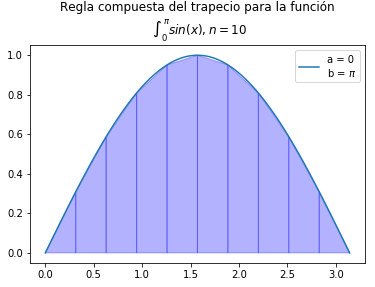

In [10]:
%matplotlib inline
# x y y grafican los trapezoides debajo de la curva, solo vamos a dibujar N trapezoides
N = 10
x = np.linspace(a,b,N+1)
y = f(x)

# X y Y grafican la funcion f(x) = sin(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y, label = "a = 0\nb = $\pi$")

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.30)
plt.title('Regla compuesta del trapecio para la función\n $\int_0^{\pi}sin(x), n=10$')
plt.legend()
plt.show()

### Cuadratura Gauss-Legendre
Usamos la fórmula $\displaystyle \int_{a}^{b}f(t)dt \approx \frac{(b-a)}{2} \displaystyle \sum_{i=0}^nw_if \left (\frac{1}{2}[(b-a)x_i+a+b] \right )$

   4. Usando la función `GLf` del módulo `numerical_integration.py` aproximar la siguiente integral usando cuadratura Gauss-Legendre:

    $\displaystyle \int_0^1e^{-\frac{t^2}{2}}dt \approx .855624391892149$


In [11]:
f = lambda t: np.exp(-t**2/2)
a = 0
b = 1
n = 3
aprox = GLf(f,a,b,n)
print(aprox)

0.8556243854609658


   * Gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal)

In [12]:
obj = .855624391892149
df = tuple((n,relative_absolute_error(GLf(f,a,b,n),obj)) for n in range(1, 6))
df = pd.DataFrame.from_records(df, columns =['n', 'error']) 

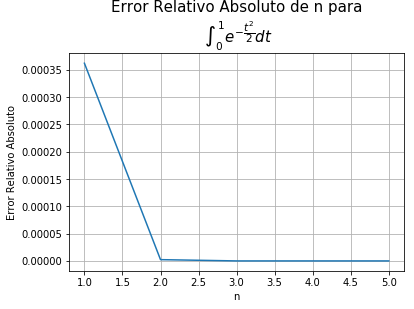

In [13]:
%matplotlib inline
df.plot(x = 'n', y = 'error', legend=None)
plt.title('Error Relativo Absoluto de n para\n $\int_0^{1}e^{-\dfrac{t^2}{2}}dt$', fontsize=15)
plt.xlabel('n', fontsize=10)
plt.ylabel('Error Relativo Absoluto', fontsize=10)
plt.grid()
plt.show()     

### Cuadratura Gauss-Hermite
Teniendo integrales de la forma $\displaystyle \int_{-\infty}^{\infty}e^{-x^2} f(x) dx \approx \displaystyle \sum_{i=0}^nw_if(x_i)$. Aplicamos el cambio de variables usando $\displaystyle  x = \frac{y-\mu}{\sigma\sqrt{2}} $ ó $ \sigma\sqrt{2}x + \mu$. Finalmente, calculamos la aproximación de la integral usando $\displaystyle    \sum_{i=0}^n\frac{1}{\sqrt{\pi}}w_if(\sqrt{2}\sigma x_i+\mu)$

   * Aproximación de la integral
   
   $(2\pi\sigma^{2})^{-\frac{1}{2}}\displaystyle \int_{-\infty}^{\infty}te \frac{-(t-\mu)^{2}}{2\sigma^{2}} dt \approx \frac{1}{\sqrt{\pi}}$
   
   Dónde $\sigma=0.25, \mu=0.15$, su valor objetivo es $0.15$ y $n=5$.

In [22]:
sigma = 0.25
mu = 0.15
f1 = lambda t: t
GH1_approx = GHf(f1,mu,sigma)
print(GH1_approx)

0.15


   * Aproximación de la integral
   
   $(2\pi\sigma^{2})^{-\frac{1}{2}}\displaystyle \int_{-\infty}^{\infty}t^{2}e \frac{-(t-\mu)^{2}}{2\sigma^{2}} dt \approx \frac{1}{\sqrt{\pi}}$
   
   Dónde $\sigma=0.25, \mu=0.15$, su valor objetivo es $0.085$ y $n=5$.

In [24]:
f2 = lambda t: t**2
print(GHf(f2, mu,sigma))

0.08499999999999998
